In [27]:
# image compression using scikit learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
image = plt.imread('sample_data/sanp.jpg')
plt.imshow(image)

In [29]:
#print the shape of original image
h, w, c = image.shape
print(h,w, c)
print(image.dtype)
print(image.min(), image.max())

3624 2295 3
uint8
0 255


In [30]:
#get the pixels
pixels = image.reshape(-1, 3)
print(pixels.shape)

(8317080, 3)


In [59]:
#define the kmean model using sklearn
k=16
kmeans = KMeans(n_clusters=k, random_state=42)
labels=kmeans.fit_predict(pixels)
compressed_pixels = np.rint(kmeans.cluster_centers_[labels]).astype(np.uint8)
compressed_img = compressed_pixels.reshape(h,w,c)
print(compressed_img.min(), compressed_img.max(), compressed_img.dtype)
print(f"final clusters->{np.rint(kmeans.cluster_centers_)}")



20 253 uint8
final clusters->[[192. 188. 177.]
 [ 94.  88.  76.]
 [163. 160. 152.]
 [230. 224. 207.]
 [ 23.  21.  20.]
 [114. 106.  93.]
 [152. 147. 129.]
 [ 77.  71.  62.]
 [177. 174. 167.]
 [215. 211. 198.]
 [253. 252. 245.]
 [ 55.  49.  44.]
 [204. 199. 187.]
 [193. 183. 145.]
 [227. 214. 184.]
 [135. 127. 110.]]


Text(0.5, 1.0, 'compressed image')

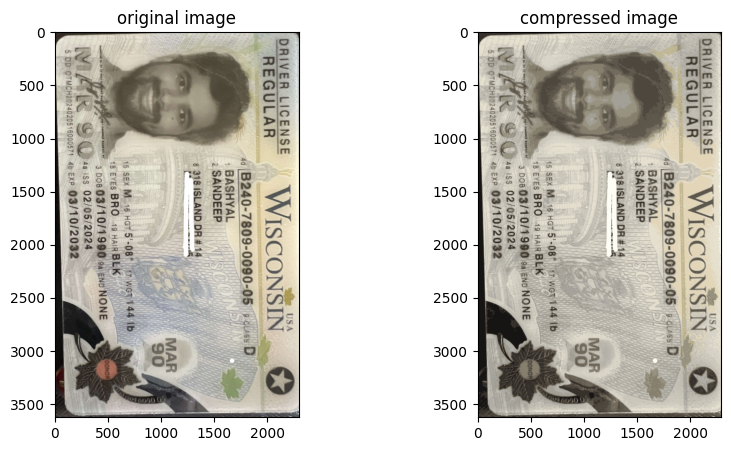

In [57]:
#print the original and compressed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("original image")
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_img)
plt.title("compressed image")
# plt.axis('off')

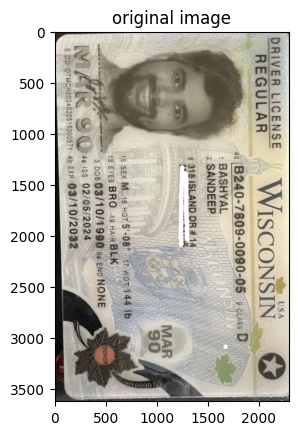

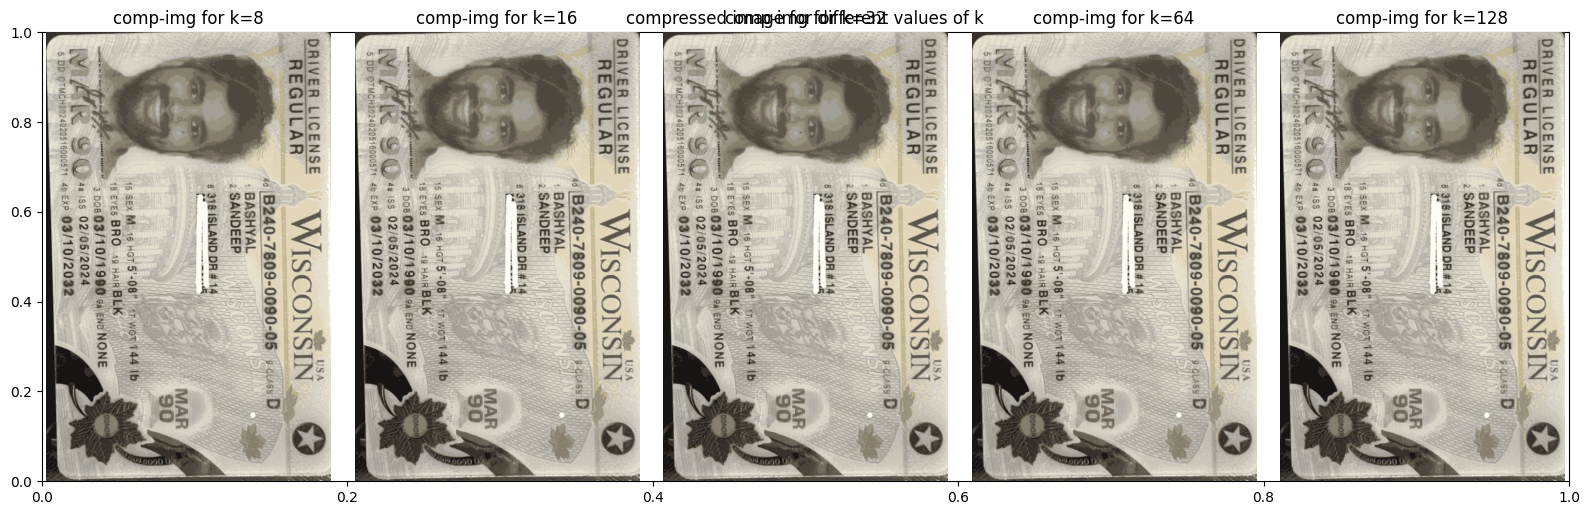

In [65]:
#try different vaues of k
k_list=[8,16, 32, 64,128]

plt.imshow(image)
plt.title("original image")
plt.figure(figsize=(16, 5))
plt.title("compressed image for different values of k")
for i, k_val in enumerate(k_list):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(pixels)
  compressed_pixels = np.rint(kmeans.cluster_centers_[labels]).astype(np.uint8)
  compressed_img = compressed_pixels.reshape(h, w, c)

  plt.subplot(1, 5, i+1)
  plt.imshow(compressed_img)
  plt.title(f"comp-img for k={k_val}")
  plt.axis('off')

plt.tight_layout()
plt.show()

